## import the nhanes data

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pylab as plt
# %matplotlib inline

from sklearn.ensemble import RandomForestClassifier
#GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# from sklearn.cross_validation import StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('C:\\Users\\lenovo\\dissertation\\data_train_cvd.csv')
df_test = pd.read_csv('C:\\Users\\lenovo\\dissertation\\data_test_cvd.csv')

print('Training set size:', df_train.shape[0])
print('Test set size:', df_test.shape[0])

Training set size: 14352
Test set size: 3588


In [3]:
df_train

,SEQN,RIDAGEYR,RIAGENDR,BPXSY1,BPXDI1,BMXBMI,SMQ020,DIQ010,LBXTC,status
0,75342.0,73.0,1.0,120.0,36.0,27.9,2.0,1.0,157.0,0
1,58192.0,75.0,2.0,144.0,68.0,24.1,1.0,2.0,212.0,0
2,55997.0,45.0,2.0,98.0,74.0,28.7,1.0,2.0,187.0,1
3,37129.0,61.0,1.0,152.0,74.0,33.0,2.0,1.0,219.0,0
4,63964.0,62.0,1.0,104.0,64.0,44.1,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...
14347,65524.0,63.0,1.0,NaN,NaN,23.0,1.0,2.0,227.0,0
14348,69648.0,80.0,1.0,100.0,44.0,23.2,1.0,2.0,190.0,0
14349,57885.0,47.0,2.0,106.0,80.0,41.4,2.0,2.0,205.0,1
14350,56005.0,60.0,1.0,128.0,76.0,36.9,1.0,3.0,154.0,1


In [4]:
df_train.describe()

,SEQN,RIDAGEYR,RIAGENDR,BPXSY1,BPXDI1,BMXBMI,SMQ020,DIQ010,LBXTC,status
count,14352.000000,14352.000000,14352.000000,13053.000000,13053.000000,14095.000000,14352.000000,14352.000000,13503.000000,14352.000000
mean,57686.019997,59.775362,1.511427,129.319697,71.116525,29.267095,1.512890,1.860577,198.779605,0.332009
std,14742.746514,12.521154,0.499887,20.137283,13.643786,6.661764,0.525008,0.460858,42.799919,0.470951
min,31130.000000,40.000000,1.000000,66.000000,0.000000,13.400000,1.000000,1.000000,75.000000,0.000000
25%,45446.500000,49.000000,1.000000,116.000000,64.000000,24.800000,1.000000,2.000000,169.000000,0.000000
50%,57391.500000,60.000000,2.000000,126.000000,72.000000,28.300000,2.000000,2.000000,196.000000,0.000000
75%,69632.750000,70.000000,2.000000,140.000000,80.000000,32.500000,2.000000,2.000000,225.000000,1.000000
max,83729.000000,85.000000,2.000000,256.000000,134.000000,130.200000,9.000000,9.000000,615.000000,1.000000


In [5]:
df_train['status'].sum()/len(df_train)

0.33200947603121517

## clean the data & process the missing data

#### continous numerical data

In [6]:
# glipse the proportion
proportion = df_train.isnull().sum(axis=0)/df_train.shape[0]
proportion

SEQN        0.000000
RIDAGEYR    0.000000
RIAGENDR    0.000000
BPXSY1      0.090510
BPXDI1      0.090510
BMXBMI      0.017907
SMQ020      0.000000
DIQ010      0.000000
LBXTC       0.059156
status      0.000000
dtype: float64

In [7]:
# continous numeirical data in train set
df_train.loc[df_train.BPXSY1.isnull(), 'BPXSY1'] = df_train.BPXSY1.mean()
df_train.loc[df_train.BMXBMI.isnull(), 'BMXBMI'] = df_train.BMXBMI.mean()
df_train.loc[df_train.LBXTC.isnull(), 'LBXTC'] = df_train.LBXTC.mean()
df_train.loc[df_train.BPXDI1.isnull(), 'BPXDI1'] = df_train.BPXDI1.mean()

# continous numeirical data in test set
df_test.loc[df_test.BPXSY1.isnull(), 'BPXSY1'] = df_test.BPXSY1.mean()
df_test.loc[df_test.BMXBMI.isnull(), 'BMXBMI'] = df_test.BMXBMI.mean()
df_test.loc[df_test.LBXTC.isnull(), 'LBXTC'] = df_test.LBXTC.mean()
df_test.loc[df_test.BPXDI1.isnull(), 'BPXDI1'] = df_test.BPXDI1.mean()

In [8]:
# clean NaN
df_train.dropna(axis = 0, how = 'any', inplace = True)
df_test.dropna(axis = 0, how = 'any', inplace = True)
df_train

,SEQN,RIDAGEYR,RIAGENDR,BPXSY1,BPXDI1,BMXBMI,SMQ020,DIQ010,LBXTC,status
0,75342.0,73.0,1.0,120.000000,36.000000,27.9,2.0,1.0,157.000000,0
1,58192.0,75.0,2.0,144.000000,68.000000,24.1,1.0,2.0,212.000000,0
2,55997.0,45.0,2.0,98.000000,74.000000,28.7,1.0,2.0,187.000000,1
3,37129.0,61.0,1.0,152.000000,74.000000,33.0,2.0,1.0,219.000000,0
4,63964.0,62.0,1.0,104.000000,64.000000,44.1,1.0,1.0,198.779605,1
...,...,...,...,...,...,...,...,...,...,...
14347,65524.0,63.0,1.0,129.319697,71.116525,23.0,1.0,2.0,227.000000,0
14348,69648.0,80.0,1.0,100.000000,44.000000,23.2,1.0,2.0,190.000000,0
14349,57885.0,47.0,2.0,106.000000,80.000000,41.4,2.0,2.0,205.000000,1
14350,56005.0,60.0,1.0,128.000000,76.000000,36.9,1.0,3.0,154.000000,1


In [9]:
df_train.isnull().sum(axis=0)
df_test.isnull().sum(axis=0)

SEQN        0
RIDAGEYR    0
RIAGENDR    0
BPXSY1      0
BPXDI1      0
BMXBMI      0
SMQ020      0
DIQ010      0
LBXTC       0
status      0
dtype: int64

#### categorical data

In [10]:
# 7 means 'refused'
# 9 means 'donot know'
df_train[['SMQ020', 'status']].groupby(['SMQ020'], as_index=False).mean()

,SMQ020,status
0,1.0,0.384320
1,2.0,0.281802
2,7.0,0.000000
3,9.0,0.200000


In [11]:
# 3 means 'Borderline'
# 9 means 'donot know'
df_train[['DIQ010', 'status']].groupby(['DIQ010'], as_index=False).mean()

,DIQ010,status
0,1.0,0.447273
1,2.0,0.305054
2,3.0,0.389294
3,9.0,0.333333


In [12]:
# delete these data
df_train = df_train.drop(index = df_train[df_train.SMQ020 == 7.0].index)
df_train = df_train.drop(index = df_train[df_train.SMQ020 == 9.0].index)
df_train = df_train.drop(index = df_train[df_train.DIQ010 == 9.0].index)
df_train = df_train.drop(index = df_train[df_train.DIQ010 == 3.0].index)
df_train = df_train.drop(index = df_train[df_train.BPXDI1 == 0.0].index)
df_train.reset_index(drop=True,inplace=True)
df_train.columns = ['SEQN','Age','Gender','Systolic','Diastolic','BMI','Smoke','Diabetes','Cholesterol','Status']
df_train

,SEQN,Age,Gender,Systolic,Diastolic,BMI,Smoke,Diabetes,Cholesterol,Status
0,75342.0,73.0,1.0,120.000000,36.000000,27.9,2.0,1.0,157.000000,0
1,58192.0,75.0,2.0,144.000000,68.000000,24.1,1.0,2.0,212.000000,0
2,55997.0,45.0,2.0,98.000000,74.000000,28.7,1.0,2.0,187.000000,1
3,37129.0,61.0,1.0,152.000000,74.000000,33.0,2.0,1.0,219.000000,0
4,63964.0,62.0,1.0,104.000000,64.000000,44.1,1.0,1.0,198.779605,1
...,...,...,...,...,...,...,...,...,...,...
13832,81617.0,52.0,1.0,198.000000,80.000000,25.4,1.0,1.0,175.000000,1
13833,65524.0,63.0,1.0,129.319697,71.116525,23.0,1.0,2.0,227.000000,0
13834,69648.0,80.0,1.0,100.000000,44.000000,23.2,1.0,2.0,190.000000,0
13835,57885.0,47.0,2.0,106.000000,80.000000,41.4,2.0,2.0,205.000000,1


In [13]:
df_test = df_test.drop(index = df_test[df_test.SMQ020 == 7.0].index)
df_test = df_test.drop(index = df_test[df_test.SMQ020 == 9.0].index)
df_test = df_test.drop(index = df_test[df_test.DIQ010 == 9.0].index)
df_test = df_test.drop(index = df_test[df_test.DIQ010 == 3.0].index)
df_test = df_test.drop(index = df_test[df_test.BPXDI1 == 0.0].index)

df_test.reset_index(drop=True,inplace=True)
df_test.columns = ['SEQN','Age','Gender','Systolic','Diastolic','BMI','Smoke','Diabetes','Cholesterol','Status']
df_test

,SEQN,Age,Gender,Systolic,Diastolic,BMI,Smoke,Diabetes,Cholesterol,Status
0,60971.0,64.0,1.0,114.0,70.0,23.800000,1.0,2.0,140.000000,0
1,55424.0,47.0,2.0,116.0,78.0,25.900000,1.0,2.0,189.000000,1
2,74306.0,62.0,1.0,114.0,66.0,33.300000,1.0,1.0,136.000000,0
3,74782.0,59.0,2.0,156.0,90.0,31.200000,2.0,2.0,215.000000,0
4,58593.0,77.0,1.0,98.0,58.0,32.900000,2.0,2.0,131.000000,1
...,...,...,...,...,...,...,...,...,...,...
3453,65617.0,41.0,1.0,108.0,78.0,24.300000,2.0,2.0,198.743187,0
3454,74609.0,46.0,2.0,96.0,68.0,26.800000,2.0,2.0,177.000000,0
3455,42298.0,57.0,2.0,142.0,62.0,23.800000,2.0,2.0,319.000000,0
3456,61584.0,46.0,2.0,88.0,66.0,29.370319,1.0,2.0,198.743187,0


## visualization

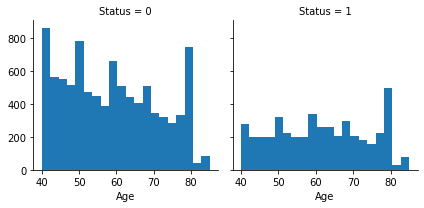

In [14]:
g = sns.FacetGrid(df_train, col='Status')
g.map(plt.hist, 'Age', bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


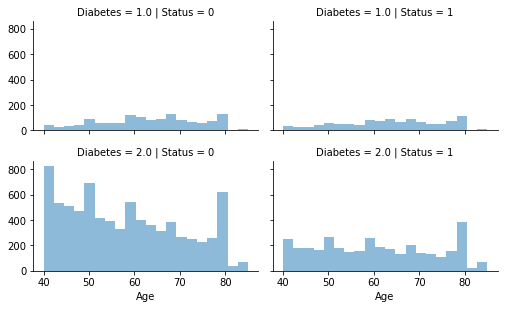

In [15]:
grid = sns.FacetGrid(df_train, col='Status', row='Diabetes', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

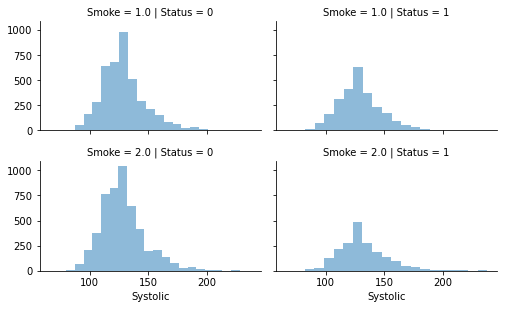

In [16]:
grid = sns.FacetGrid(df_train, col='Status', row='Smoke', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Systolic', alpha=.5, bins=20)
grid.add_legend();

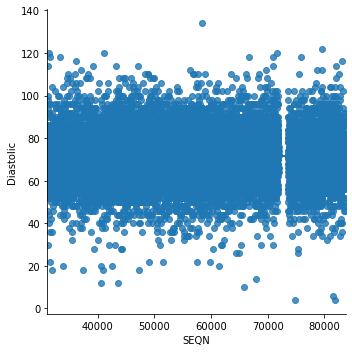

In [17]:
sns.lmplot('SEQN','Diastolic',df_train)

## feature engineer

In [18]:
data_feature = df_train.drop(['SEQN'], axis = 1)\
                       .drop(['Gender'], axis = 1)\
                       .drop(['Smoke'], axis = 1)\
                       .drop(['Diabetes'], axis = 1)\
                       .drop(['Status'], axis = 1)
data_feature

,Age,Systolic,Diastolic,BMI,Cholesterol
0,73.0,120.000000,36.000000,27.9,157.000000
1,75.0,144.000000,68.000000,24.1,212.000000
2,45.0,98.000000,74.000000,28.7,187.000000
3,61.0,152.000000,74.000000,33.0,219.000000
4,62.0,104.000000,64.000000,44.1,198.779605
...,...,...,...,...,...
13832,52.0,198.000000,80.000000,25.4,175.000000
13833,63.0,129.319697,71.116525,23.0,227.000000
13834,80.0,100.000000,44.000000,23.2,190.000000
13835,47.0,106.000000,80.000000,41.4,205.000000


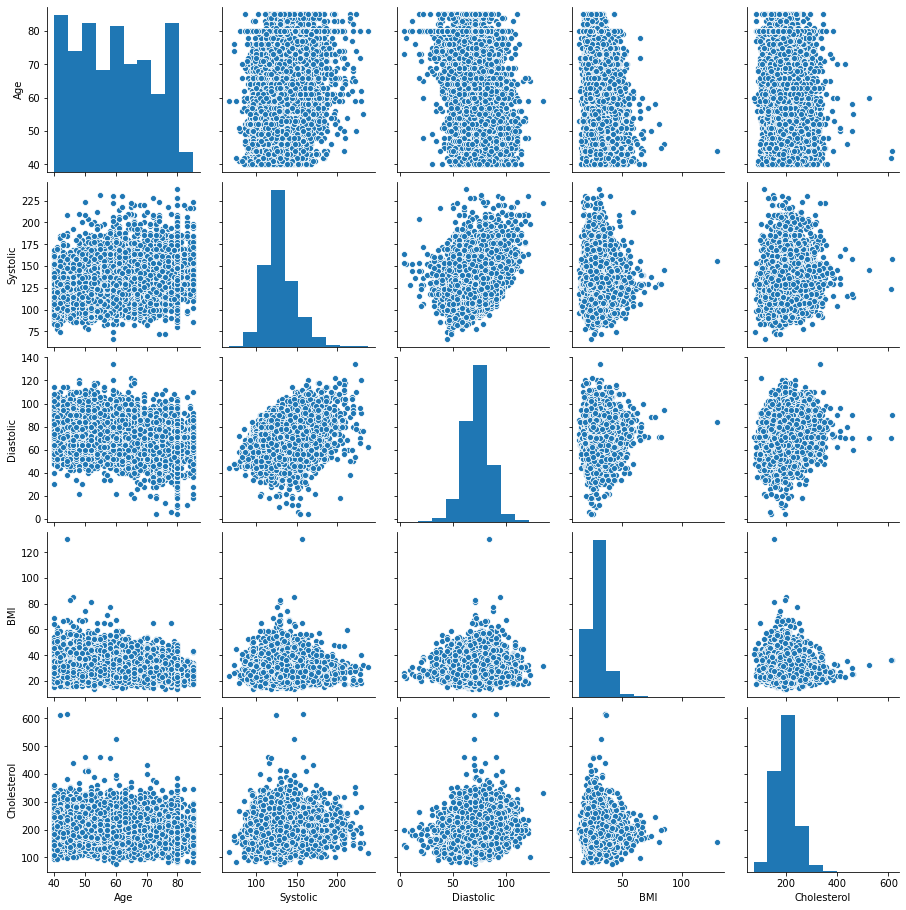

In [19]:
df = pd.DataFrame(data_feature)
# pairplot_fig = sns.pairplot(df)
# pairplot_fig.savefig('pairplot1.png',dpi = 400)
pairplot_fig = sns.pairplot(data = df,vars = ['Age','Systolic','Diastolic','BMI','Cholesterol'])
pairplot_fig.savefig('pairplot_num_feature.png',dpi = 400)

In [20]:
age = data_feature.Age.values

cor_list = []
# for i in range(data_feature.shape[1]-1):
cor_1 = np.corrcoef(data_feature.Systolic.values, age)
cor_list.append(abs(cor_1[0,1]))
cor_2 = np.corrcoef(data_feature.Diastolic.values, age)
cor_list.append(abs(cor_2[0,1]))
cor_3 = np.corrcoef(data_feature.BMI.values, age)
cor_list.append(abs(cor_3[0,1]))
cor_4 = np.corrcoef(data_feature.Cholesterol.values, age)
cor_list.append(abs(cor_4[0,1]))
print(cor_list)

[0.3319672793354871, 0.26866281743123593, 0.08190791027384979, 0.10848822096510824]


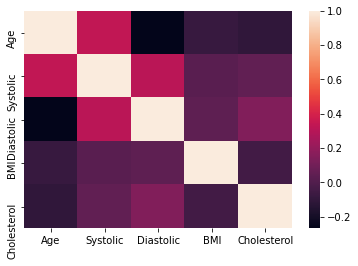

In [21]:
r_pearson = data_feature.corr()
sns.heatmap(data = r_pearson)

## label the catogorical data

In [22]:
data_nor = df_train.drop(['SEQN'], axis = 1)\
                   .drop(['Gender'], axis = 1)\
                   .drop(['Smoke'], axis = 1)\
                   .drop(['Diabetes'], axis = 1)\
                   .drop(['Status'], axis = 1)
data_nor

,Age,Systolic,Diastolic,BMI,Cholesterol
0,73.0,120.000000,36.000000,27.9,157.000000
1,75.0,144.000000,68.000000,24.1,212.000000
2,45.0,98.000000,74.000000,28.7,187.000000
3,61.0,152.000000,74.000000,33.0,219.000000
4,62.0,104.000000,64.000000,44.1,198.779605
...,...,...,...,...,...
13832,52.0,198.000000,80.000000,25.4,175.000000
13833,63.0,129.319697,71.116525,23.0,227.000000
13834,80.0,100.000000,44.000000,23.2,190.000000
13835,47.0,106.000000,80.000000,41.4,205.000000


In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_nor)
data_nor = pd.DataFrame(X_train_minmax)

scaler = preprocessing.StandardScaler().fit(data_nor)
X_scaled_train = scaler.transform(data_nor)
X_scaled_train = pd.DataFrame(X_scaled_train)
X_scaled_train.columns = ['age','systolic','diastolic','bmi','cholesterol']
X_scaled_train

,age,systolic,diastolic,bmi,cholesterol
0,1.070704,-0.477816,-3.026273,-0.199454,-1.010639
1,1.230519,0.775435,-0.301876,-0.777111,0.314401
2,-1.166706,-1.626629,0.208948,-0.077843,-0.287890
3,0.111814,1.193186,0.208948,0.575821,0.483043
4,0.191721,-1.313316,-0.642426,2.263186,-0.004100
...,...,...,...,...,...
13832,-0.607354,3.595250,0.719773,-0.579491,-0.576990
13833,0.271629,0.008848,-0.036543,-0.944327,0.675776
13834,1.630057,-1.522191,-2.345174,-0.913924,-0.215615
13835,-1.006891,-1.208879,0.719773,1.852746,0.145760


In [24]:
X_scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13837 entries, 0 to 13836
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          13837 non-null  float64
 1   systolic     13837 non-null  float64
 2   diastolic    13837 non-null  float64
 3   bmi          13837 non-null  float64
 4   cholesterol  13837 non-null  float64
dtypes: float64(5)
memory usage: 540.6 KB


In [25]:
x_train = pd.concat([X_scaled_train, df_train], axis =1, sort=False, ignore_index=False)
x_train

,age,systolic,diastolic,bmi,cholesterol,SEQN,Age,Gender,Systolic,Diastolic,BMI,Smoke,Diabetes,Cholesterol,Status
0,1.070704,-0.477816,-3.026273,-0.199454,-1.010639,75342.0,73.0,1.0,120.000000,36.000000,27.9,2.0,1.0,157.000000,0
1,1.230519,0.775435,-0.301876,-0.777111,0.314401,58192.0,75.0,2.0,144.000000,68.000000,24.1,1.0,2.0,212.000000,0
2,-1.166706,-1.626629,0.208948,-0.077843,-0.287890,55997.0,45.0,2.0,98.000000,74.000000,28.7,1.0,2.0,187.000000,1
3,0.111814,1.193186,0.208948,0.575821,0.483043,37129.0,61.0,1.0,152.000000,74.000000,33.0,2.0,1.0,219.000000,0
4,0.191721,-1.313316,-0.642426,2.263186,-0.004100,63964.0,62.0,1.0,104.000000,64.000000,44.1,1.0,1.0,198.779605,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13832,-0.607354,3.595250,0.719773,-0.579491,-0.576990,81617.0,52.0,1.0,198.000000,80.000000,25.4,1.0,1.0,175.000000,1
13833,0.271629,0.008848,-0.036543,-0.944327,0.675776,65524.0,63.0,1.0,129.319697,71.116525,23.0,1.0,2.0,227.000000,0
13834,1.630057,-1.522191,-2.345174,-0.913924,-0.215615,69648.0,80.0,1.0,100.000000,44.000000,23.2,1.0,2.0,190.000000,0
13835,-1.006891,-1.208879,0.719773,1.852746,0.145760,57885.0,47.0,2.0,106.000000,80.000000,41.4,2.0,2.0,205.000000,1


In [26]:
df_train = x_train.drop(['Age'], axis = 1)\
                 .drop(['Systolic'], axis = 1)\
                 .drop(['Diastolic'], axis = 1)\
                 .drop(['BMI'], axis = 1)\
                 .drop(['Cholesterol'], axis = 1)

In [27]:
data_nor_test = df_test.drop(['SEQN'], axis = 1)\
                   .drop(['Gender'], axis = 1)\
                   .drop(['Smoke'], axis = 1)\
                   .drop(['Diabetes'], axis = 1)\
                   .drop(['Status'], axis = 1)

min_max_scaler = preprocessing.MinMaxScaler()
X_test_minmax = min_max_scaler.fit_transform(data_nor_test)
data_nor_test = pd.DataFrame(X_test_minmax)

scaler = preprocessing.StandardScaler().fit(data_nor_test)
X_scaled_test = scaler.transform(data_nor_test)
X_scaled_test = pd.DataFrame(X_scaled_test)
X_scaled_test.columns = ['age','systolic','diastolic','bmi','cholesterol']

x_test = pd.concat([X_scaled_test, df_test], axis =1, sort=False, ignore_index=False)
df_test = x_test.drop(['Age'], axis = 1)\
                 .drop(['Systolic'], axis = 1)\
                 .drop(['Diastolic'], axis = 1)\
                 .drop(['BMI'], axis = 1)\
                 .drop(['Cholesterol'], axis = 1)
df_test

,age,systolic,diastolic,bmi,cholesterol,SEQN,Gender,Smoke,Diabetes,Status
0,0.349701,-0.783207,-0.142416,-0.835360,-1.414698,60971.0,1.0,1.0,2.0,0
1,-1.010372,-0.680157,0.546640,-0.516863,-0.238783,55424.0,2.0,1.0,2.0,1
2,0.189692,-0.783207,-0.486944,0.605459,-1.510691,74306.0,1.0,1.0,1.0,0
3,-0.050321,1.380850,1.580224,0.286962,0.385172,74782.0,2.0,2.0,2.0,0
4,1.389756,-1.607610,-1.176000,0.544793,-1.630682,58593.0,1.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
3453,-1.490397,-1.092358,0.546640,-0.759527,-0.004963,65617.0,1.0,2.0,2.0,0
3454,-1.090376,-1.710661,-0.314680,-0.380364,-0.526762,74609.0,2.0,2.0,2.0,0
3455,-0.210329,0.659498,-0.831472,-0.835360,2.880991,42298.0,2.0,2.0,2.0,0
3456,-1.090376,-2.122862,-0.486944,0.009463,-0.004963,61584.0,2.0,1.0,2.0,0


In [28]:
cat_cols = ["Gender", "Smoke", "Diabetes"]
# con_cols = ["RIDAGEYR", "BPXSY1","BPXDI1", "BMXBMI", "LBXTC"]

# list = [df_train[con_cols]]

for i in cat_cols:
    df_train = pd.get_dummies(df_train, prefix=[i], columns = [i], drop_first=True)

y_train = df_train.Status
X_train = df_train.drop(['Status'], axis=1)
X_train = X_train.drop(['SEQN'],axis = 1)
X_train

,age,systolic,diastolic,bmi,cholesterol,Gender_2.0,Smoke_2.0,Diabetes_2.0
0,1.070704,-0.477816,-3.026273,-0.199454,-1.010639,0,1,0
1,1.230519,0.775435,-0.301876,-0.777111,0.314401,1,0,1
2,-1.166706,-1.626629,0.208948,-0.077843,-0.287890,1,0,1
3,0.111814,1.193186,0.208948,0.575821,0.483043,0,1,0
4,0.191721,-1.313316,-0.642426,2.263186,-0.004100,0,0,0
...,...,...,...,...,...,...,...,...
13832,-0.607354,3.595250,0.719773,-0.579491,-0.576990,0,0,0
13833,0.271629,0.008848,-0.036543,-0.944327,0.675776,0,0,1
13834,1.630057,-1.522191,-2.345174,-0.913924,-0.215615,0,0,1
13835,-1.006891,-1.208879,0.719773,1.852746,0.145760,1,1,1


In [29]:
for i in cat_cols:
    df_test = pd.get_dummies(df_test, prefix=[i], columns = [i], drop_first=True)

y_test  = df_test.Status
X_test = df_test.drop(['Status'], axis=1)
# X_test = X_test.drop(['BPXCHR'], axis = 1)
X_test = X_test.drop(['SEQN'], axis = 1)
X_test

,age,systolic,diastolic,bmi,cholesterol,Gender_2.0,Smoke_2.0,Diabetes_2.0
0,0.349701,-0.783207,-0.142416,-0.835360,-1.414698,0,0,1
1,-1.010372,-0.680157,0.546640,-0.516863,-0.238783,1,0,1
2,0.189692,-0.783207,-0.486944,0.605459,-1.510691,0,0,0
3,-0.050321,1.380850,1.580224,0.286962,0.385172,1,1,1
4,1.389756,-1.607610,-1.176000,0.544793,-1.630682,0,1,1
...,...,...,...,...,...,...,...,...
3453,-1.490397,-1.092358,0.546640,-0.759527,-0.004963,0,1,1
3454,-1.090376,-1.710661,-0.314680,-0.380364,-0.526762,1,1,1
3455,-0.210329,0.659498,-0.831472,-0.835360,2.880991,1,1,1
3456,-1.090376,-2.122862,-0.486944,0.009463,-0.004963,1,0,1


### match the columns

In [30]:
# train_cols = X_train.columns
# for col in train_cols:
#     if col not in X_test:
#         X_test.loc[:,col] = 0
        
# # match columns
# X_test = X_test[train_cols]

## establish and assess models

### find the best parameters for RF

In [31]:
param_test1 = {'n_estimators':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=200,class_weight='balanced',
                                  min_samples_leaf=20,max_depth=7,max_features='auto' ,random_state=1000), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 200}, 0.6664227684476041)

In [32]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,301,50)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 120, class_weight='balanced',
                                  min_samples_leaf=10,max_features='auto' ,oob_score=True, random_state=1000),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 300}, 0.6671005737611978)

In [33]:
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 120, max_depth=7,class_weight='balanced',
                                  max_features='auto' ,oob_score=True, random_state=1000),
   param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 120}, 0.6669423448889532)

### Random Forest

In [34]:
from sklearn.metrics import confusion_matrix
rdf = RandomForestClassifier(
            class_weight='balanced', 
            criterion='gini',
            max_depth=7, max_features='auto',n_estimators=200,
            min_samples_split=140,min_samples_leaf=10,
            oob_score=True)

rdf.fit(X_train, y_train)
rdf_predicted = rdf.predict(X_test)

In [35]:
confusion_matrix(y_test, rdf_predicted) 

array([[1492,  882],
       [ 423,  661]], dtype=int64)

In [36]:
y_predprob = rdf.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob))
y_predtest = rdf.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predtest))
print('-'*30)
# rdf_predicted = rdf.predict(X_test)
print('Recall Score:  %f' % metrics.recall_score(y_test, rdf_predicted))
print('Precision Score:  %f' % metrics.precision_score(y_test, rdf_predicted))
print('F1 Score: %f' % metrics.f1_score(y_test, rdf_predicted))
print('Accuracy Score:  %f' % metrics.accuracy_score(y_test, rdf_predicted))

AUC Score (Train): 0.707410
AUC Score (Test): 0.667100
------------------------------
Recall Score:  0.609779
Precision Score:  0.428386
F1 Score: 0.503236
Accuracy Score:  0.622614


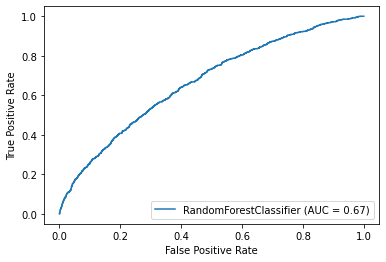

In [37]:
# plot_roc_curve(predicted, y_test)
metrics.plot_roc_curve(rdf, X_test, y_test)
plt.show()

### find the best parameter for LR

In [38]:
param_test4 = {'C':[0.01,0.1,1,10,100,500,1000], 'max_iter':[100,250,500,1000,1250,1500]}
gsearch4 = GridSearchCV(estimator = LogisticRegression(),
   param_grid = param_test4, scoring='roc_auc',cv=5,n_jobs=-1,verbose=1)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 203 out of 210 | elapsed:   14.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   14.3s finished


({'C': 10, 'max_iter': 100}, 0.6629356811799564)

### Logistic Regression

In [39]:
lrw = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=100, C=10)
lrw.fit(X_train, y_train)
lrw_predicted = lrw.predict(X_test)

y_train_proba = lrw.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train,  y_train_proba))
y_test_proba = lrw.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_proba))
print('-'*30)
print('Recall Score:  %f' % metrics.recall_score(y_test, lrw_predicted))
print('Precision Score:  %f' % metrics.precision_score(y_test, lrw_predicted))
print('F1 Score: %f' % metrics.f1_score(y_test, lrw_predicted))
print('Accuracy Score:  %f' % metrics.accuracy_score(y_test, lrw_predicted))

AUC Score (Train): 0.664091
AUC Score (Test): 0.658096
------------------------------
Recall Score:  0.592251
Precision Score:  0.416073
F1 Score: 0.488770
Accuracy Score:  0.611625


In [40]:
#print the confusion matrix
confusion_matrix(y_test, lrw_predicted)

array([[1473,  901],
       [ 442,  642]], dtype=int64)

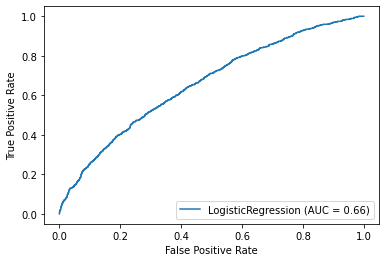

In [41]:
metrics.plot_roc_curve(lrw, X_test, y_test)
plt.show()

### find the best parameter for knn

In [42]:
param_grid_knn = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [43]:
gsearch_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                       param_grid = param_grid_knn, scoring='roc_auc',cv=5)
gsearch_knn.fit(X_train, y_train)
gsearch_knn.best_params_, gsearch_knn.best_score_

({'n_neighbors': 10, 'p': 1, 'weights': 'distance'}, 0.6120149926114875)

### KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=10, p=1,weights='distance')

knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

# print("training set score:{:.3f}".format(knn.score(X_train, y_train))) 
# print("test set score:{:.3f}".format(knn.score(X_test,y_test)))

y_train_proba_knn = knn.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train,  y_train_proba_knn))
y_test_proba_knn = knn.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_proba_knn))
print('-'*30)
print('Recall Score:  %f' % metrics.recall_score(y_test, knn_predicted))
print('Precision Score:  %f' % metrics.precision_score(y_test, knn_predicted))
print('F1 Score: %f' % metrics.f1_score(y_test, knn_predicted))
print('Accuracy Score:  %f' % metrics.accuracy_score(y_test, knn_predicted))

AUC Score (Train): 1.000000
AUC Score (Test): 0.616963
------------------------------
Recall Score:  0.250923
Precision Score:  0.435897
F1 Score: 0.318501
Accuracy Score:  0.663389


In [45]:
#print the confusion matrix
confusion_matrix(y_test, knn_predicted) 

array([[2022,  352],
       [ 812,  272]], dtype=int64)

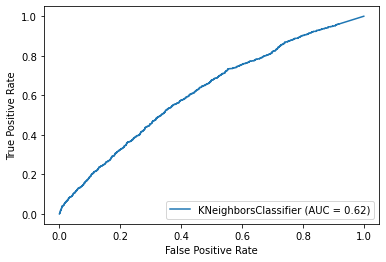

In [46]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

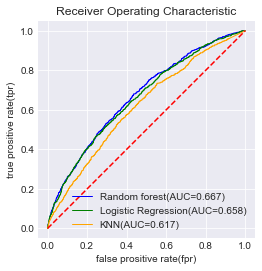

In [47]:
def rocs_plot(names, sampling_methods, colors, X_test, y_test, dpin=100):
    plt.style.use('seaborn-darkgrid')
    for (name, method, colorname) in zip(names, sampling_methods, colors):
        method.fit(X_train, y_train)
        y_test_preds = method.predict(X_test)
        y_test_predprob = method.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predprob, pos_label=1)
#     for i, y_pred in enumerate(y_pred_list):
#         fpr, tpr, thresholds = metrics.roc_curve(y_test_list[i], y_pred)
        roc_auc = metrics.auc(fpr, tpr)
#         plt.plot(fpr, tpr, lw=1, label='AUC Score:  %f' %roc_auc, color = colorname)
        plt.plot(fpr, tpr, lw=1, label='{}(AUC={:.3f})'.format(name, roc_auc),color = colorname)
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.axis('square')

        plt.xlabel('false prositive rate(fpr)')
        plt.ylabel('true prositive rate(tpr)')
        plt.title('Receiver Operating Characteristic')
        plt.legend()

# y_test_list = [y_test, y_test, y_test]
# y_pred_list = [rdf_predicted, lrw_predicted, knn_predicted]
names = ['Random forest', 'Logistic Regression', 'KNN']
sampling_methods = [rdf,lrw,knn]
# rocs_plot(y_test_list, y_pred_list)
colors = ['b','g','orange']
rocs_plot(names,sampling_methods,colors=colors,X_test=X_test,y_test=y_test)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')

### Calibration

No handles with labels found to put in legend.


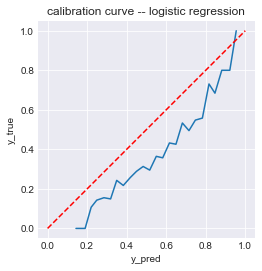

In [48]:
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
prob_true, prob_pred = calibration_curve(y_test, y_test_proba, n_bins = 30)

plt.plot(prob_pred, prob_true)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axis('square')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('calibration curve -- logistic regression')
plt.legend()
plt.show()

No handles with labels found to put in legend.


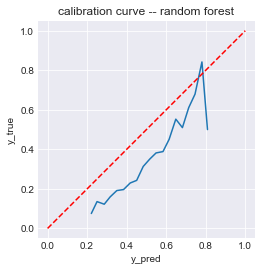

In [49]:
prob_true_1, prob_pred_1 = calibration_curve(y_test, y_predtest, n_bins = 30)

plt.plot(prob_pred_1, prob_true_1)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axis('square')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('calibration curve -- random forest')
plt.legend()
plt.show()

No handles with labels found to put in legend.


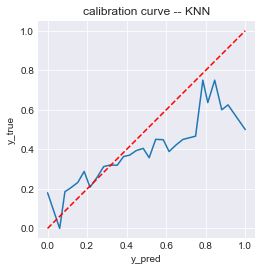

In [50]:
prob_true_knn, prob_pred_knn = calibration_curve(y_test, y_test_proba_knn, n_bins = 30)

plt.plot(prob_pred_knn, prob_true_knn)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axis('square')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('calibration curve -- KNN')
plt.legend()
plt.show()

## unweighted model

In [51]:
#use the model
rf = RandomForestClassifier() 

rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

#print the score
# print("training set score:{:.3f}".format(rf.score(X_train, y_train))) 
# print("test set score:{:.3f}".format(rf.score(X_test,y_test)))

# print AUC score
print('-'*30)
y_predprob_unweight = rf.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob_unweight))
y_predtest_unweight = rf.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predtest_unweight))
print('-'*30)
print('Recall Score:  %f' % metrics.recall_score(y_test, rf_predicted))
print('Precision Score:  %f' % metrics.precision_score(y_test, rf_predicted))
print('F1 Score: %f' % metrics.f1_score(y_test, rf_predicted))
print('Accuracy Score:  %f' % metrics.accuracy_score(y_test, rf_predicted))

------------------------------
AUC Score (Train): 1.000000
AUC Score (Test): 0.644254
------------------------------
Recall Score:  0.277675
Precision Score:  0.489431
F1 Score: 0.354326
Accuracy Score:  0.682765


In [52]:
lr = LogisticRegression(solver='lbfgs', max_iter=100, C=10)

lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

print('-'*30)
y_train_proba_unweight = lr.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train,  y_train_proba_unweight))
y_test_proba_unweight = lr.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_proba_unweight))
print('-'*30)
print('Recall Score:  %f' % metrics.recall_score(y_test, lr_predicted))
print('Precision Score:  %f' % metrics.precision_score(y_test, lr_predicted))
print('F1 Score: %f' % metrics.f1_score(y_test, lr_predicted))
print('Accuracy Score:  %f' % metrics.accuracy_score(y_test, lr_predicted))

------------------------------
AUC Score (Train): 0.664040
AUC Score (Test): 0.658296
------------------------------
Recall Score:  0.195572
Precision Score:  0.556430
F1 Score: 0.289420
Accuracy Score:  0.698959


No handles with labels found to put in legend.


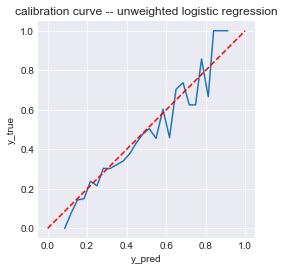

In [53]:
prob_true2, prob_pred2 = calibration_curve(y_test, y_test_proba_unweight, n_bins = 30)

plt.plot(prob_pred2, prob_true2)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axis('square')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('calibration curve -- unweighted logistic regression')
plt.legend()
plt.show()

No handles with labels found to put in legend.


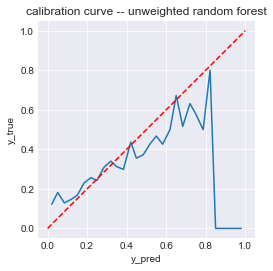

In [54]:
prob_true_3, prob_pred_3 = calibration_curve(y_test, y_predtest_unweight, n_bins = 30)

plt.plot(prob_pred_3, prob_true_3)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.axis('square')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('calibration curve -- unweighted random forest')
plt.legend()
plt.show()